# Import necessary packages

In [2]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from preprocessing import handle_missing_values, data_cleaning, merge_datasets, eda, feature_engineering, normalize_and_scale, encode_categorical, save_processed_data,ip_to_int

import  preprocessing as prep


# Load the data


In [3]:
fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_data = pd.read_csv('../data/raw/IpAddress_to_Country.csv')


In [5]:
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


# Handle missing values


In [4]:
fraud_data = prep.handle_missing_values(fraud_data)

# Data cleaning


In [5]:
fraud_data = prep.data_cleaning(fraud_data)

# Exploratory Data Analysis


Univariate Analysis:
             user_id                    signup_time  \
count  151112.000000                         151112   
mean   200171.040970  2015-04-20 00:56:09.511329280   
min         2.000000            2015-01-01 00:00:42   
25%    100642.500000     2015-02-18 09:52:48.500000   
50%    199958.000000            2015-04-19 04:41:30   
75%    300054.000000  2015-06-18 14:47:22.750000128   
max    400000.000000            2015-08-18 04:40:29   
std    115369.285024                            NaN   

                       purchase_time  purchase_value            age  \
count                         151112   151112.000000  151112.000000   
mean   2015-06-16 02:56:38.759952896       36.935372      33.140704   
min              2015-01-01 00:00:44        9.000000      18.000000   
25%       2015-04-18 14:41:25.500000       22.000000      27.000000   
50%       2015-06-18 13:46:17.500000       35.000000      33.000000   
75%       2015-08-17 18:48:31.500000       49.000000     

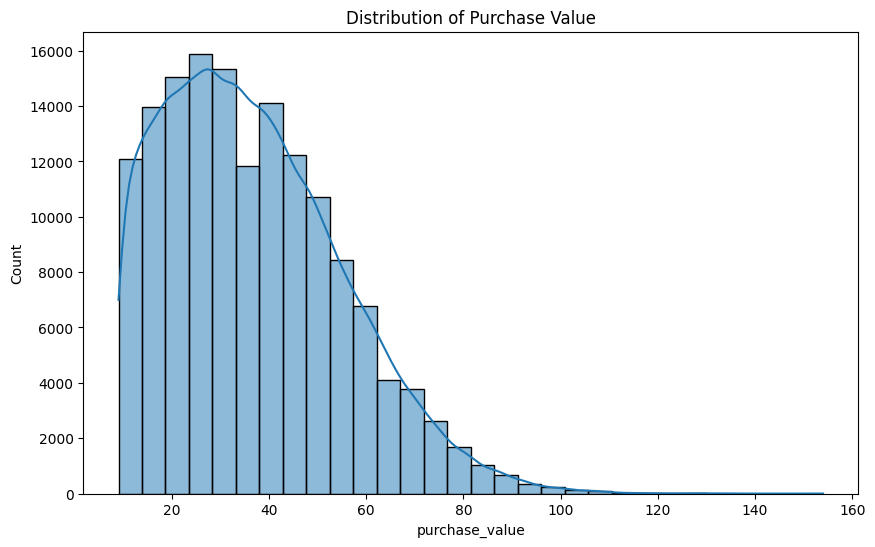


Bivariate Analysis:
class           0         1
browser                    
Chrome   0.901208  0.098792
FireFox  0.904835  0.095165
IE       0.913225  0.086775
Opera    0.910773  0.089227
Safari   0.909799  0.090201


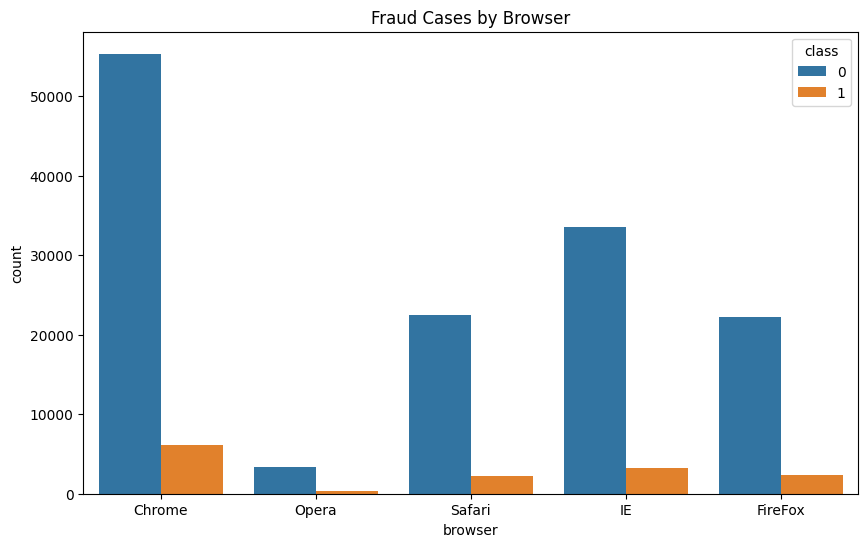

In [6]:
prep.eda(fraud_data)

# Merge datasets for geolocation analysis


In [7]:
merged_data = prep.merge_datasets(fraud_data, ip_data)

In [8]:
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_int,lower_bound_ip_address,upper_bound_ip_address,country,lower_bound_ip_address_int,upper_bound_ip_address_int
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,732758368,7.298089e+08,734003199,Japan,729808896,734003199
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,350311387,3.355443e+08,352321535,United States,335544320,352321535
2,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,415583117,4.154982e+08,415629311,United States,415498240,415629311
3,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,1692458727,1.686110e+09,1694498815,United States,1686110208,1694498815
4,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,341674739,3.355443e+08,352321535,United States,335544320,352321535


# Feature engineering


In [9]:
engineered_data = prep.feature_engineering(merged_data)

# Normalization and Scaling


In [10]:
columns_to_scale = ['purchase_value', 'signup_to_purchase']
scaled_data = prep.normalize_and_scale(engineered_data, columns_to_scale)

# Encode categorical features


In [11]:
columns_to_encode = ['source', 'browser', 'sex']
encoded_data = prep.encode_categorical(scaled_data, columns_to_encode)

# View the processed data


In [12]:
encoded_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_int,lower_bound_ip_address,upper_bound_ip_address,country,lower_bound_ip_address_int,upper_bound_ip_address_int,signup_to_purchase,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160648,QVPSPJUOCKZAR,2,0,1,39,7.327584e+08,0,732758368,7.298089e+08,734003199,Japan,729808896,734003199,-0.135970,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.139604,EOGFQPIZPYXFZ,0,0,0,53,3.503114e+08,0,350311387,3.355443e+08,352321535,United States,335544320,352321535,-1.572556,1,0
2,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.111284,NAUITBZFJKHWW,0,4,1,45,4.155831e+08,0,415583117,4.154982e+08,415629311,United States,415498240,415629311,-0.182447,18,2
3,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,-0.541354,HPUCUYLMJBYFW,0,3,1,34,1.692459e+09,0,1692458727,1.686110e+09,1694498815,United States,1686110208,1694498815,-0.212125,17,0
4,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,1.362172,NRFFPPHZYFUVC,0,2,1,31,3.416747e+08,0,341674739,3.355443e+08,352321535,United States,335544320,352321535,0.003911,23,0


In [15]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73036 entries, 0 to 73035
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     73036 non-null  int64         
 1   signup_time                 73036 non-null  datetime64[ns]
 2   purchase_time               73036 non-null  datetime64[ns]
 3   purchase_value              73036 non-null  float64       
 4   device_id                   73036 non-null  object        
 5   source                      73036 non-null  int32         
 6   browser                     73036 non-null  int32         
 7   sex                         73036 non-null  int32         
 8   age                         73036 non-null  int64         
 9   ip_address                  73036 non-null  float64       
 10  class                       73036 non-null  int64         
 11  ip_address_int              73036 non-null  int64     

In [17]:
# # Save the processed data to a CSV file
#prep.save_processed_data(encoded_data, 'processed_fraud_data.csv')

Data saved to processed_fraud_data.csv
